# Step 1: Pull the data from the API

In [179]:
# import the libraries
import pandas as pd
import requests
import json
from config import headers
import numpy as np
import matplotlib as plt
import seaborn as sns

In [180]:
# Read the data from the csv file and print it out
df = pd.read_csv('Resources/cleaned_data.csv')
df.head()

,Unnamed: 0,asin,product_title,product_price,currency,product_star_rating,product_num_ratings,product_num_offers,product_minimum_offer_price,is_best_seller,is_amazon_choice,is_prime,climate_pledge_friendly,sales_volume,delivery
0,0,B0D49CWPH2,"USB C to USB C Cable, (5Pack 6FT), New Nylon U...",29.66,USD,5.0,91,1,$29.66,False,False,True,False,10K+ bought in past month,"FREE delivery Mon, Jun 10 on $35 of items ship..."
1,1,B0D2X7Y7VF,USB C to Lightning Cable [Apple MFi Certified]...,7.49,USD,4.4,41,1,$7.49,False,False,True,False,3K+ bought in past month,"FREE delivery Mon, Jun 10 on $35 of items ship..."
2,2,B0D12T4WZT,USB C Charger for iPhone 14 13 12 11 Charger [...,9.99,USD,5.0,51,1,$9.99,False,False,True,False,3K+ bought in past month,"FREE delivery Mon, Jun 10 on $35 of items ship..."
3,3,B0CZPHPJLN,Beats Solo 4 - Wireless Bluetooth On-Ear Headp...,149.95,USD,4.1,92,1,$149.95,False,False,True,False,3K+ bought in past month,"FREE delivery Mon, Jun 10 Or fastest delivery ..."
4,4,B0C58MS6HF,"Anker Magnetic Power Bank 10,000mAh, Wireless ...",39.99,USD,4.3,5689,1,$39.99,False,False,True,True,10K+ bought in past month,"FREE delivery Mon, Jun 10 Or fastest delivery ..."


We want to get the reviews from the a live data and we need the ASIN for each product review to get it. To do that we will get the ASIN from the products dataframe and store it into a list and then run a function to get all the reviews for the products and store it into a json file

In [181]:
# Store the asin for each product into a variable and convert it into a list
df_asin = df['asin'].tolist()


In [182]:
# Define the function to get reviews based on asin
def get_reviews(asin):
    url = "https://real-time-amazon-data.p.rapidapi.com/search"

    querystring = {"asin":asin,"country":"US","sort_by":"TOP_REVIEWS","star_rating":"ALL","verified_purchases_only":"false","images_or_videos_only":"false","current_format_only":"false"}
    
    response = requests.get(url, headers=headers, params=querystring)
    if response.status_code == 200:
        return response.json()
    else:
        return None

In [183]:
# Function to get reviews based on ASIN
def get_reviews(asin):
    url = "https://real-time-amazon-data.p.rapidapi.com/product-reviews"
    querystring = {
        "asin": asin,
        "country": "US",
        "sort_by": "TOP_REVIEWS",
        "star_rating": "ALL",
        "verified_purchases_only": "false",
        "images_or_videos_only": "false",
        "current_format_only": "false"
    }
    
    response = requests.get(url, headers=headers, params=querystring)
    
    if response.status_code == 200:
        try:
            data = response.json()
            return data
        except json.JSONDecodeError:
            print(f"Error decoding JSON for ASIN {asin}")
            return None
    elif response.status_code == 404:
        print(f"Error 404 for ASIN {asin}")
        return None
    else:
        print(f"Error {response.status_code} for ASIN {asin}: {response.text}")
        return None


# Initialize a list to store the results
reviews_list = []

# Loop through the asin list and fetch reviews
for asin in df_asin:
    reviews = get_reviews(asin)
    if reviews:
        print(f"Fetched reviews for ASIN {asin}")
        reviews_list.append(reviews)
    else:
        print(f"No reviews found for ASIN {asin}")

# save the reviews to a JSON file
with open('Resources/reviews.json', 'w') as f:
    json.dump(reviews_list, f, indent=4)

Fetched reviews for ASIN B0D49CWPH2
Fetched reviews for ASIN B0D2X7Y7VF
Fetched reviews for ASIN B0D12T4WZT
Fetched reviews for ASIN B0CZPHPJLN
Fetched reviews for ASIN B0C58MS6HF
Fetched reviews for ASIN B0CWXNS552
Fetched reviews for ASIN B0CN6GHGD6
Fetched reviews for ASIN B0CXSTPWL5
Fetched reviews for ASIN B0CYGC7SY3
Fetched reviews for ASIN B099VMT8VZ
Fetched reviews for ASIN B0D14PZ16V
Fetched reviews for ASIN B0CR11MG8F
Fetched reviews for ASIN B07T6FNLQV
Fetched reviews for ASIN B0D295BJQP
Fetched reviews for ASIN B0C9V811L6
Fetched reviews for ASIN B0D14HHDGJ
Fetched reviews for ASIN B0CZ3TD6J2
Fetched reviews for ASIN B0C8VKH1ZH
Fetched reviews for ASIN B0CXT8RNJB
Fetched reviews for ASIN B084Y3VVNG
Fetched reviews for ASIN B0CWV7WVGW
Fetched reviews for ASIN B0D2NL9X6M
Fetched reviews for ASIN B00DOMYL24
Fetched reviews for ASIN 0521809266
Fetched reviews for ASIN B0CGDDXY11
Fetched reviews for ASIN B0D2ZWVCS4
Fetched reviews for ASIN B0CZ414K56
Fetched reviews for ASIN B0C

### Convert the json file into a dataframe

In [184]:
# Load the JSON data from the file
with open('Resources/reviews.json', 'r') as f:
    reviews_data = json.load(f)

# Initialize an empty list to store all reviews
all_reviews = []

# Extract reviews for each unique ASIN
for entry in reviews_data:
    asin_data = entry.get('data', {})
    asin = asin_data.get('asin')
    reviews_list = asin_data.get('reviews', [])
    for review in reviews_list:
        review['asin'] = asin  # Add the ASIN to each review
        all_reviews.append(review)

# Convert the list of reviews to a DataFrame
reviews_df = pd.DataFrame(all_reviews)
reviews_df.reset_index(inplace=True)
# Display the DataFrame
reviews_df.head()


,index,review_id,review_title,review_comment,review_star_rating,review_link,review_author,review_author_avatar,review_images,review_video,review_date,is_verified_purchase,reviewed_product_asin,asin,helpful_vote_statement
0,0,RS1Z754NPU9RO,Charges my bike computer very well.,This pack of usb-c to usb-c cables is perfectl...,5,https://www.amazon.com/gp/customer-reviews/RS1...,DWS,https://images-na.ssl-images-amazon.com/images...,[],None,"Reviewed in the United States on June 8, 2024",True,B0D49CWPH2,B0D49CWPH2,NaN
1,1,R2J932BDC7P4WW,"Dependable, high-performance, longevity",The USB C to USB C Cable 5-Pack (6FT) is a rel...,5,https://www.amazon.com/gp/customer-reviews/R2J...,junji yokota,https://images-na.ssl-images-amazon.com/images...,[],None,"Reviewed in the United States on June 5, 2024",True,B0D49CWPH2,B0D49CWPH2,NaN
2,2,R1DZH09ZCC4E0J,Excellent quality!,I got the cables yesterday and immediately put...,5,https://www.amazon.com/gp/customer-reviews/R1D...,Jack C.,https://images-na.ssl-images-amazon.com/images...,[https://m.media-amazon.com/images/I/71BsA-giC...,None,"Reviewed in the United States on May 30, 2024",True,B0D49CWPH2,B0D49CWPH2,One person found this helpful
3,3,R2J65OW79GGAGT,CHARGES SO FAST,So cheap and charges so fast. I got these to c...,5,https://www.amazon.com/gp/customer-reviews/R2J...,Kathy Chhim,https://images-na.ssl-images-amazon.com/images...,[],None,"Reviewed in the United States on May 27, 2024",True,B0D49CWPH2,B0D49CWPH2,NaN
4,4,R23X2QRTWBE5ZH,Great Quality Charging Cables!!,Extremely pleased with the high quality of the...,5,https://www.amazon.com/gp/customer-reviews/R23...,LS,https://images-na.ssl-images-amazon.com/images...,[https://m.media-amazon.com/images/I/61uX0Xc1T...,None,"Reviewed in the United States on June 1, 2024",True,B0D49CWPH2,B0D49CWPH2,NaN


# Quick EDA

In [194]:
reviews_df.shape

(3118, 15)

<Axes: title={'center': 'Count of Reviews By Stars'}, xlabel='review_star_rating'>

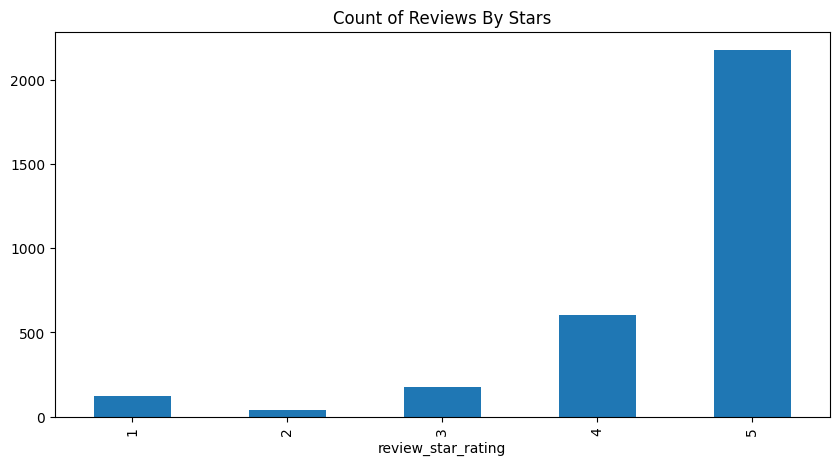

In [185]:
reviews_df['review_star_rating'].value_counts().sort_index().plot(kind='bar', title='Count of Reviews By Stars', figsize=(10,5))

# Step 2: NLP

# Roberta Pretrained Model
After getting the reviews dataset. We will use Natural Language Proccessing to determine wether the review is positive or negative using Roberta Pretrained Model 
- Use a model trained of a large corpus of data
- Transformer model accurate for the words but also the context related to other words

In [186]:
# import libraries
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from tqdm.notebook import tqdm
from scipy.special import softmax
import pytorch_pretrained_bert as ppb
assert 'bert-large-cased' in ppb.modeling.PRETRAINED_MODEL_ARCHIVE_MAP



In [187]:
# using Twitter Roberta pretrained model to get the polarity score of the review_comments
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment-latest"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)


/Users/amer/anaconda3/lib/python3.11/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassificatio

Try the model on an example review to see if it works with no issues

In [188]:
# get the first value and store to test it as an example
example = reviews_df['review_comment'].values[1]
example

"The USB C to USB C Cable 5-Pack (6FT) is a reliable and versatile charging solution, especially for my iPhone 15. Each cable is 6 feet long, providing ample reach for various charging scenarios. The cables support 60W (3A) power delivery, ensuring fast and efficient charging. The durable nylon braiding enhances longevity, making these cables resistant to wear and tear. With five cables in the pack, this is an excellent value, offering multiple options for home, office, or travel use. Overall, it's a dependable and cost-effective choice for anyone needing high-performance USB C charging cables."

In [189]:
# get the score of the example
encoded_text = tokenizer(example, return_tensors='pt')
output = model(**encoded_text)
score = output[0][0].detach().numpy()
score = softmax(score)
scores_dict = {
    'neg' : score[0],
    'neu' : score[1],
    'pos' : score[2]
    }
scores_dict

{'neg': 0.0051451507, 'neu': 0.11775922, 'pos': 0.8770956}

In [190]:
# Function to get the polarity score
def polarity_score_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    score = output[0][0].detach().numpy()
    score = softmax(score)
    scores_dict = {
        'neg' : score[0],
        'neu' : score[1],
        'pos' : score[2]
    }
    return scores_dict

In [191]:
# Run the polarity score on the entire dataset
res = {}
for i, row in tqdm(reviews_df.iterrows(), total=len(reviews_df)):
        try:
            text = row['review_comment']
            id = row['index']
            roberta_result = polarity_score_roberta(text)
            res[id] = roberta_result
        except: AttributeError
    
        


  0%|          | 0/3118 [00:00<?, ?it/s]

In [192]:
# Convert the results into a DataFrame
sentiment_df = pd.DataFrame.from_dict(res, orient='index', columns=['neg', 'neu', 'pos'])
print(sentiment_df.shape)
# Calculate the compound score
sentiment_df['compound'] = sentiment_df['pos'] - sentiment_df['neg']

# Print the resulting DataFrame
sentiment_df.head()

(3025, 3)


,neg,neu,pos,compound
0,0.007262,0.057638,0.935100,0.927839
1,0.005145,0.117759,0.877096,0.871950
2,0.004950,0.035781,0.959269,0.954319
3,0.003901,0.026577,0.969522,0.965621
4,0.003326,0.010886,0.985788,0.982462


In [193]:
# Merge sentiment_df with the original dataframe reviews_df on the reviewed_product_asin column
merged_df = pd.merge(reviews_df, sentiment_df, how='left', left_on='index', right_index=True)

# Print the resulting merged DataFrame
merged_df.head()

,index,review_id,review_title,review_comment,review_star_rating,review_link,review_author,review_author_avatar,review_images,review_video,review_date,is_verified_purchase,reviewed_product_asin,asin,helpful_vote_statement,neg,neu,pos,compound
0,0,RS1Z754NPU9RO,Charges my bike computer very well.,This pack of usb-c to usb-c cables is perfectl...,5,https://www.amazon.com/gp/customer-reviews/RS1...,DWS,https://images-na.ssl-images-amazon.com/images...,[],None,"Reviewed in the United States on June 8, 2024",True,B0D49CWPH2,B0D49CWPH2,NaN,0.007262,0.057638,0.935100,0.927839
1,1,R2J932BDC7P4WW,"Dependable, high-performance, longevity",The USB C to USB C Cable 5-Pack (6FT) is a rel...,5,https://www.amazon.com/gp/customer-reviews/R2J...,junji yokota,https://images-na.ssl-images-amazon.com/images...,[],None,"Reviewed in the United States on June 5, 2024",True,B0D49CWPH2,B0D49CWPH2,NaN,0.005145,0.117759,0.877096,0.871950
2,2,R1DZH09ZCC4E0J,Excellent quality!,I got the cables yesterday and immediately put...,5,https://www.amazon.com/gp/customer-reviews/R1D...,Jack C.,https://images-na.ssl-images-amazon.com/images...,[https://m.media-amazon.com/images/I/71BsA-giC...,None,"Reviewed in the United States on May 30, 2024",True,B0D49CWPH2,B0D49CWPH2,One person found this helpful,0.004950,0.035781,0.959269,0.954319
3,3,R2J65OW79GGAGT,CHARGES SO FAST,So cheap and charges so fast. I got these to c...,5,https://www.amazon.com/gp/customer-reviews/R2J...,Kathy Chhim,https://images-na.ssl-images-amazon.com/images...,[],None,"Reviewed in the United States on May 27, 2024",True,B0D49CWPH2,B0D49CWPH2,NaN,0.003901,0.026577,0.969522,0.965621
4,4,R23X2QRTWBE5ZH,Great Quality Charging Cables!!,Extremely pleased with the high quality of the...,5,https://www.amazon.com/gp/customer-reviews/R23...,LS,https://images-na.ssl-images-amazon.com/images...,[https://m.media-amazon.com/images/I/61uX0Xc1T...,None,"Reviewed in the United States on June 1, 2024",True,B0D49CWPH2,B0D49CWPH2,NaN,0.003326,0.010886,0.985788,0.982462


### Now that we have the Sentiment Score compound ready, We can use it as a label to train it into Neural Network Deep learning Machine Learning.